In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
from pathlib import Path
import spyrit.misc.walsh_hadamard as wh

from spyrit.misc.statistics import stat_walsh_stl10
from spyrit.misc.statistics import *
from spyrit.misc.disp import *

In [2]:
img_size = 64 # image size
M = 1024    # number of measurements
N0 = 10     # Image intensity (in photons)

#- Model and data paths
data_root = Path('../../data/')
stats_root = Path('../../data/stats_walsh')

In [3]:
#%% A batch of STL-10 test images
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)

transform = transforms.Compose(
    [transforms.functional.to_grayscale,
     transforms.Resize((img_size, img_size)),
     transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

testset = \
    torchvision.datasets.STL10(root=data_root, split='test',download=False, transform=transform)
testloader =  torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

In [4]:
inputs, _ = next(iter(testloader))
b,c,h,w = inputs.shape

In [5]:
# stat_walsh_stl10()
Cov = np.load(stats_root / Path("Cov_{}x{}.npy".format(img_size, img_size)))
Mean = np.load(stats_root / Path("Average_{}x{}.npy".format(img_size, img_size)))
H =  wh.walsh2_matrix(img_size)
# H =  wh.walsh2_matrix(img_size)/img_size
# Cov /= img_size*img_size # THIS NEEDS TO BE NORMALIAZED FOR CONSISTENCY!


Ord = Cov2Var(Cov)
Perm = Permutation_Matrix(Ord)
Pmat = np.dot(Perm,H);
Pmat = Pmat[:M,:];


In [6]:
from spyrit.restructured.Updated_Had_Dcan import * 

In [5]:
F = Forward_operator(Pmat)

In [6]:
inputs.shape

torch.Size([128, 1, 64, 64])

In [7]:
x = inputs.view(b*c,w*h)

In [8]:
x.shape

torch.Size([128, 4096])

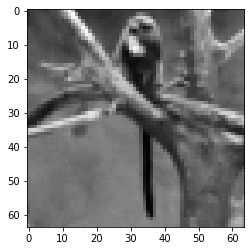

In [9]:
img = x[1,:]
img = img.numpy();
plt.imshow(np.reshape(img,(h,w)), cmap='gray') 

In [10]:
y = F(x)

In [11]:
x_est = F.adjoint(y)

In [12]:
x_est.shape

torch.Size([128, 4096])

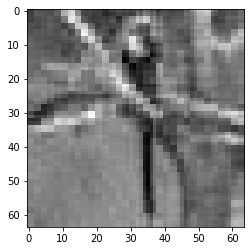

In [13]:
img = x_est[1,:]
img = img.numpy();
plt.imshow(np.reshape(img,(h,w)), cmap='gray') 

In [14]:
np.amax(img)

2872.2512

In [15]:
P = Pinv(F)

NameError: name 'Pinv' is not defined

In [16]:
x_pinv = P(y)

NameError: name 'P' is not defined

In [17]:
img = x_pinv[1,:]
img = img.numpy();
plt.imshow(np.reshape(img,(h,w)), cmap='gray') 

NameError: name 'x_pinv' is not defined

In [18]:
np.amax(img)

2872.2512

In [19]:
# #%% Simulate measurements
# # model = noiCompNet(img_size, M, Mean, Cov, N0=N0, sig=0, H=H)
# model = model.to(device)
# inputs = inputs.to(device)

# torch.manual_seed(0)    # for reproducibility
# # raw = model.forward_acquire(inputs, b, c, h, w) # with pos/neg coefficients

# #%% Reconstruction 
# # recon = model.forward_reconstruct_mmse(raw, b, c, h, w)

# #%% Select two images in the batch
# i_im = [71,72]
# img = inputs[i_im, 0, :, :].cpu().detach().numpy().astype(np.float32, copy=False)
# rec = recon[i_im, 0, :, :].cpu().detach().numpy()

# #%% Error
# #-- plot
# f, axs = plt.subplots(1, 4, figsize=(12,8),  dpi= 100)
# axs[0].imshow(img[0], cmap='gray') 
# axs[1].imshow(rec[0], cmap='gray')
# axs[2].imshow(img[1], cmap='gray')
# axs[3].imshow(rec[1], cmap='gray');
# axs[0].set_title("ground-truth")
# axs[1].set_title("Completion recon")
# axs[2].set_title("ground-truth")
# axs[3].set_title("Completion recon")
# f.suptitle(f'Simulations assuming {N0} photons')


# Pos-neg forward operator

In [ ]:
F = Split_Forward_operator(Pmat)

In [ ]:
x = inputs.view(b*c,w*h)


In [ ]:
m = F((x+1)/2)

In [ ]:
m.shape

In [ ]:
F.Hpos_neg.weight.data

In [ ]:
B = Bruit_Poisson_approx_Gauss(N0,F)

In [ ]:
m_alpha = B(x)

In [ ]:
m_alpha.shape

In [ ]:
print(N0*m-m_alpha)

In [ ]:
m

In [ ]:
m_alpha

Ok, seems like Bruit_Poisson_approx_Gauss works as intended